In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
life=pd.read_csv("Life Expectancy Data.csv")
life.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', ' BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria','HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling']
life

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:


def LinearMiniBatchDescent(x,y,Constants,learningRate,batch_size,Lambda):
    X_train,X_valid,y_train,y_valid=train_test_split(x, y, test_size=0.1, random_state=42)
    size=batch_size
    out=y_train.values
    validationMSE=0
    length=len(X.columns)
    delta=np.zeros(length+1)
    iterations=0
    indice=0
    currentMSE=0
    trainingMSEs=[]
    validationMSEs=[]
    CheckMSE=[]
    All_Constants=[]
    validationMSEs.append(LinearPrediction(X_valid,y_valid,Constants,Lambda))
    previousMSE=np.inf
    while (previousMSE-currentMSE>=0.01 or iterations<5):
        slopes=Constants[:length]
        c=Constants[length]
        Ypred=X_train.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
        diff=np.subtract(Ypred,out).tolist()
        diff=np.asarray(diff)
        trainingMSE=(diff**2).sum()/batch_size
        trainingMSEs.append(trainingMSE)
        batch_indices = (np.arange(indice, indice + batch_size)) % X_train.shape[0]
        batch_indices = batch_indices.astype(int)
        X_batch = X_train.iloc[batch_indices]
        y_batch = out[batch_indices]
        diff_batch=diff[batch_indices]
        delta[:length]=(2*(np.dot(X_batch.T, diff_batch))/batch_size).tolist()
        delta[:length] = list(np.array(delta[:length]) + 2 * Lambda * np.array(delta[:length]))
        delta[length]=((2*(diff_batch)).sum())/size

        prevConstants=Constants
        Constants=Constants-delta*learningRate
        validationMSE=LinearPrediction(X_valid,y_valid,Constants,Lambda)
        iterations+=1
        indice=indice+batch_size
        validationMSEs.append(validationMSE)
        if iterations<5:
            CheckMSE.append(validationMSE)
            pass
        else:
            LatestFiveMSEs=validationMSEs[iterations-5:iterations]
            if iterations<=250 and batch_size!=1:
              previousMSE=max(LatestFiveMSEs)
            elif iterations<400 and batch_size==1:
              previousMSE=max(LatestFiveMSEs)
            else:
              previousMSE=currentMSE
            currentMSE=min(LatestFiveMSEs)
            CheckMSE.append(currentMSE)
            # print(currentMSE)
        All_Constants.append(Constants)
    return trainingMSEs,validationMSEs,prevConstants,iterations,All_Constants

def LinearPrediction(X,y,Constants,Lambda):
    out=y.values
    length=len(X.columns)
    slopes=Constants[:length]
    c=Constants[length]
    size=X.shape[0]
    Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
    MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
    return MSE

In [4]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']])
life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']]=imputedData
print(life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                     10
Infant Deaths                        0
Alcohol                              0
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                                0
Total Expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [5]:
scaler = StandardScaler()
X=life[['Alcohol', 'Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
y=life['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
length=len(X.columns)+1
# Constants=np.random.rand(length)
Constants=np.array([0.71412257, 0.95880379, 0.51390224, 0.93763644, 0.33583024,
       0.15607157, 0.74435779])
learningRate=float(input("Enter the learning Rate you intend to use "))
Lambda=float(input("Enter the degree of regularization "))
batch_size=float(input("Enter the batch_size "))
AlltrainMSE,AllvalidMSE,Constants,iterations,All_weights=LinearMiniBatchDescent(X_train,y_train,Constants,learningRate,batch_size,Lambda)
testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
trainMSE=LinearPrediction(X_train,y_train,Constants,Lambda)
print("The trainiMSE is "+str(trainMSE)+" ,last validMSE was "+str(AllvalidMSE[-1])+" and the testMSE is "+str(testMSE))
print("The number of iterations required for convergence is "+str(iterations))
print("The constants to be used are "+ str(Constants))

Enter the learning Rate you intend to use 0.01
Enter the degree of regularization 0.1
Enter the batch_size 100
The trainiMSE is 39.22163041595441 ,last validMSE was 41.46092521125133 and the testMSE is 39.69740500494691
The number of iterations required for convergence is 251
The constants to be used are [ 2.67334729 -0.71233098 -0.8011837   1.56088946  2.16430188 -4.67446638
 68.91837573]


In [8]:
# Create a DataFrame
df = pd.DataFrame(All_weights, columns=['Alcohol', 'Hepatitis','Measles','Polio','Diphtheria', 'HIV/AIDS', 'Y-Intercept'])
df['Algo']=['Mini-Batch-Gradient']*df.shape[0]
# Display the DataFrame
print(df)

      Alcohol  Hepatitis   Measles     Polio  Diphtheria  HIV/AIDS  \
0    0.794181   0.728074  0.538615  1.021175    0.277439  0.284705   
1    0.733339   0.740768  0.707495  0.738724    0.146124  0.182505   
2    0.800200   0.722783  0.758807  0.775298    0.227206 -0.059057   
3    0.910799   0.932397  0.585131  0.841939    0.267520 -0.051507   
4    1.021527   0.646416  0.605865  0.997164    0.316694 -0.151053   
..        ...        ...       ...       ...         ...       ...   
246  2.671573  -0.714188 -0.831115  1.543527    2.115621 -4.615620   
247  2.675242  -0.711498 -0.839367  1.539336    2.132980 -4.645573   
248  2.665140  -0.710431 -0.805829  1.545950    2.141286 -4.650429   
249  2.673347  -0.712331 -0.801184  1.560889    2.164302 -4.674466   
250  2.666158  -0.715891 -0.801755  1.586833    2.183258 -4.698396   

     Y-Intercept                 Algo  
0       2.103379  Mini-Batch-Gradient  
1       3.423056  Mini-Batch-Gradient  
2       4.731315  Mini-Batch-Gradient  

In [9]:
df_combined

,Alcohol,Hepatitis,Measles,Polio,Diphtheria,HIV/AIDS,Y-Intercept,Algo
0,0.775971,0.966025,0.452974,1.015007,0.420986,0.032844,2.117346,Batch-Gradient
1,0.835276,0.970826,0.394649,1.087785,0.501400,-0.086629,3.462834,Batch-Gradient
2,0.892159,0.973380,0.338813,1.156221,0.577330,-0.202484,4.781373,Batch-Gradient
3,0.946737,0.973848,0.285358,1.220551,0.649024,-0.314852,6.073506,Batch-Gradient
4,0.999120,0.972382,0.234181,1.281002,0.716713,-0.423860,7.339762,Batch-Gradient
...,...,...,...,...,...,...,...,...
1881,2.671573,-0.714188,-0.831115,1.543527,2.115621,-4.615620,68.872489,Mini-Batch-Gradient
1882,2.675242,-0.711498,-0.839367,1.539336,2.132980,-4.645573,68.910393,Mini-Batch-Gradient
1883,2.665140,-0.710431,-0.805829,1.545950,2.141286,-4.650429,68.934903,Mini-Batch-Gradient
1884,2.673347,-0.712331,-0.801184,1.560889,2.164302,-4.674466,68.918376,Mini-Batch-Gradient


In [7]:
df2=pd.read_csv('gradient.csv')
df_combined = pd.concat([df2, df], ignore_index=True)
df_combined
# df_combined.to_csv('gradient.csv', index=False)

,Alcohol,Hepatitis,Measles,Polio,Diphtheria,HIV/AIDS,Y-Intercept,Algo
0,0.775971,0.966025,0.452974,1.015007,0.420986,0.032844,2.117346,Batch-Gradient
1,0.835276,0.970826,0.394649,1.087785,0.501400,-0.086629,3.462834,Batch-Gradient
2,0.892159,0.973380,0.338813,1.156221,0.577330,-0.202484,4.781373,Batch-Gradient
3,0.946737,0.973848,0.285358,1.220551,0.649024,-0.314852,6.073506,Batch-Gradient
4,0.999120,0.972382,0.234181,1.281002,0.716713,-0.423860,7.339762,Batch-Gradient
...,...,...,...,...,...,...,...,...
1881,2.671573,-0.714188,-0.831115,1.543527,2.115621,-4.615620,68.872489,Mini-Batch-Gradient
1882,2.675242,-0.711498,-0.839367,1.539336,2.132980,-4.645573,68.910393,Mini-Batch-Gradient
1883,2.665140,-0.710431,-0.805829,1.545950,2.141286,-4.650429,68.934903,Mini-Batch-Gradient
1884,2.673347,-0.712331,-0.801184,1.560889,2.164302,-4.674466,68.918376,Mini-Batch-Gradient


In [10]:
df_combined.to_csv('gradient.csv', index=False)

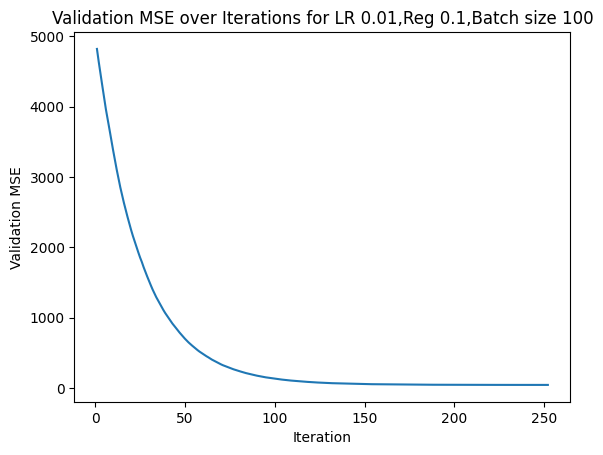

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 2), AllvalidMSE)
plt.xlabel("Iteration")
plt.ylabel("Validation MSE")
plt.title("Validation MSE over Iterations for LR 0.01,Reg 0.1,Batch size 100")
plt.show()

In [ ]:
len(AllvalidMSE)

252

In [ ]:
iterations

251

In [ ]:
batches=[10,50,100,200,300,400,500]
All_iterations=[]
All_testMSE=[]
All_iterations=[]
for i in batches:
  Constants=np.random.rand(length)
  AlltrainMSE,AllvalidMSE,Constants,iterations=LinearMiniBatchDescent(X_train,y_train,Constants,0.01,i,Lambda)
  testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
  trainMSE=LinearPrediction(X_train,y_train,Constants,Lambda)
  print("Batch size "+str(i))
  print("The test mse is "+str(testMSE))
  All_iterations.append(iterations)
  All_testMSE.append(testMSE)

Batch size 10
The test mse is 40.010004857696536
Batch size 50
The test mse is 39.79328523570232
Batch size 100
The test mse is 39.70154002628253
Batch size 200
The test mse is 39.79715480131419
Batch size 300
The test mse is 39.74102510114867
Batch size 400
The test mse is 39.778601781397576
Batch size 500
The test mse is 39.743881636737534


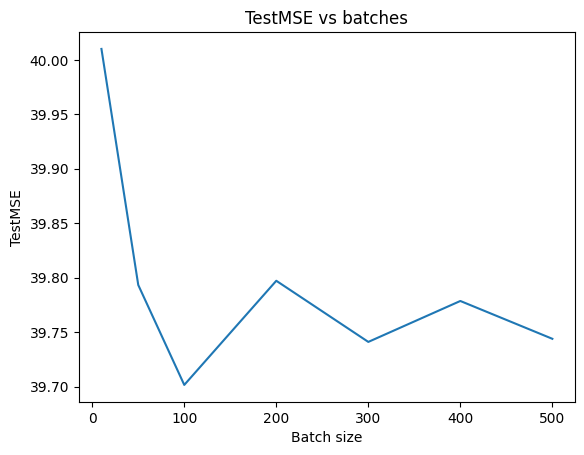

In [ ]:
plt.plot(batches, All_testMSE)
plt.xlabel("Batch size")
plt.ylabel("TestMSE")
plt.title("TestMSE vs batches")
plt.show()

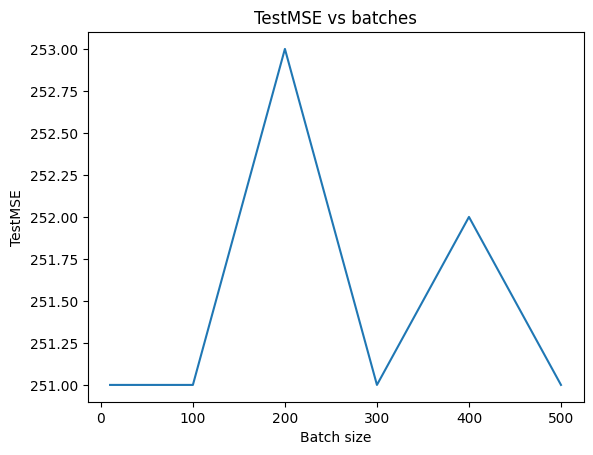

In [ ]:
plt.plot(batches, All_iterations)
plt.xlabel("Batch size")
plt.ylabel("TestMSE")
plt.title("TestMSE vs batches")
plt.show()

In [ ]:
 Ridge=Ridge(alpha=0.001,tol=0.001)
Ridge.fit(X_train,y_train)
Predictions=Ridge.predict(X_test)
ActualValues=y_test.values
MSE=(((Predictions-ActualValues)**2).sum()++Lambda*(np.sum(np.square(Constants))))/y_test.shape[0]
print("The MSE obtained after Linear Regression is "+str(MSE))
print("The coefficents are "+str(Ridge.coef_))
print("The intercept is "+str(Ridge.intercept_))

The MSE obtained after Linear Regression is 39.95949359310596
The coefficents are [ 2.6765876  -0.74143492 -0.75410451  1.60541868  2.13898509 -4.53905905]
The intercept is 69.3701849722469


In [ ]:
i=[]